# Problem 3: MiniMax and Alpha-Beta pruning for Optimal Decisions

You may use this visualization to understand how alpha beta pruning works: https://pascscha.ch/info2/abTreePractice/

*this visualization is not related to the problem stated in the homework. It is just provided to get an understanding


## Part 1



## Finding the optimal next move in modified Tic-Tac-Toe

Minimax is a Kind of Backtracking algorithm that is used in decision making and game theory to find the optimal move for a player, assuming that your opponent also plays optimally.
Alpha-Beta pruning is an optimization technique that can work on top of the Minimax algorithm to decrease computation complexity.


Your task in this section is to build an AI system that plays a perfect game. The agent will be playing a modified version of Tic-Tac-Toe where the size of the grid could be greater than or equal to 3X3.
You must use both Minimax and Minimax with Alpha-Beta pruning to solve this problem.
The input to the system will be the current state of the game in terms of a grid (list of list of str). The program must be able to produce the following outputs:


1. The Reward/value of the best move.
2. The position of the best move (the row and the column)
3. The time taken to get the optimal move in both cases (Minimax and Minimax with Alpha-Beta pruning) 

### Assumptions: 

1.   The grid will always be a square grid ( the number of rows and columns will be equal ) 
2.   'x' will be the player and 'o' will be the opponent.
3.   The player will win if he/she is able to draw a row/column/diagnol from one end of the grid to another(i.e., the maximum length it can be extended). 
4.   If there are 2 optimal positions, pick one with a lower column id
5.   Reward must be +10 in case the player wins, -10 if the opponent wins and 0 if it is a tie. The priority must always be for the player to win.
6.   The rows and columns are numbered from 0 to n.

Example: 

Input:
![tictactoe](tictactoe.png)




```
board = [
        ['x', 'o', 'x', 'o', 'x'],
        ['o', 'o', 'x', 'x', 'x'],
        ['o', 'o', 'x', 'x', 'x'],
        ['o', 'o', 'o', 'x', 'x'],
        ['_', '_', '_', '_', '_']
]
```
Output:
```
The value of the best Move is : 10

The Optimal Move using minimax is :
ROW: 4  COL: 4
time taken by minimax: 0.0014388561248779297
The value of the best Move is : 10

The Optimal Move using alpha beta pruning is :
ROW: 4  COL: 4
time taken by minimax with alpha beta pruning: 0.0009059906005859375
```

The above is just one test case, more test cases will be considered for grading this question.









In [5]:
import time

# Evaluate the board
def evaluate(board):
    n = len(board)
    # Checking for Rows for X or O victory.
    for i in range(n):
        if all(board[i][j] == 'x' for j in range(n)):
            return 10 # Player wins
        if all(board[i][j] == 'o' for j in range(n)):
            return -10 # Opponent wins
        if all(board[j][i] == 'x' for j in range(n)):
            return 10 # Player wins
        if all(board[j][i] == 'o' for j in range(n)):
            return -10 # Opponent wins
        
    # Checking for Diagonals for X or O victory.
    if all(board[i][i] == 'x' for i in range(n)):
        return 10 # Player wins
    if all(board[i][i] == 'o' for i in range(n)):
        return -10 # Opponent wins
    if all(board[i][n-i-1] == 'x' for i in range(n)):
        return 10 # Player wins
    if all(board[i][n-i-1] == 'o' for i in range(n)):
        return -10 # Opponent wins
    
    # Check tie
    if all(board[i][j] != '_' for i in range(n) for j in range(n)):
        return 0 # Tie
    
    return None # No winner yet

# Define the minimax function
def minimax(board, depth, isMax):
    score = evaluate(board)
    if score is not None:
        return score
    
    if isMax:
        best_value = -float('inf')
        for i in range(len(board)):
            for j in range(len(board)):
                if board[i][j] == '_':
                    board[i][j] = 'x'
                    value = minimax(board, depth+1, False)
                    board[i][j] = '_' # Undo the move
                    best_value = max(best_value, value)
        return best_value
    else:
        best_value = float('inf')
        for i in range(len(board)):
            for j in range(len(board)):
                if board[i][j] == '_':
                    board[i][j] = 'o'
                    value = minimax(board, depth+1, True)
                    board[i][j] = '_'
                    best_value = min(best_value, value)
        return best_value
    

# Define the alpha beta function
def alpha_beta(board, depth, alpha, beta, isMax):
    score = evaluate(board)
    if score is not None:
        return score
    
    if isMax:
        best_value = -float('inf')
        for i in range(len(board)):
            for j in range(len(board)):
                if board[i][j] == '_':
                    board[i][j] = 'x'
                    value = alpha_beta(board, depth+1, alpha, beta, False)
                    board[i][j] = '_'
                    best_value = max(best_value, value)
                    alpha = max(alpha, best_value)
                    if beta <= alpha:
                        break
        return best_value
    else:
        best_value = float('inf')
        for i in range(len(board)):
            for j in range(len(board)):
                if board[i][j] == '_':
                    board[i][j] = 'o'
                    value = alpha_beta(board, depth+1, alpha, beta, True)
                    board[i][j] = '_'
                    best_value = min(best_value, value)
                    beta = min(beta, best_value)
                    if beta <= alpha:
                        break
        return best_value



def findOptimalMove(board, method):
    '''
    Function to find the optimal next move for a modified version of Tic Tac Toe
    
    board (list[list[str]]): The current game state
    method (str): ['minimax','alpha_beta']
    '''
    best_value = -float('inf')
    best_move = (-1,-1)

    for i in range(len(board)):
        for j in range(len(board)):
            if board[i][j] == '_':
                board[i][j] = 'x' # Make the move
                if method == 'minimax':
                    move_value = minimax(board, 0, False)
                else: # 'alpha_beta':
                    move_value = alpha_beta(board, 0, -float('inf'), float('inf'), False)
                board[i][j] = '_' # Undo the move

                if move_value > best_value or (move_value == best_value and (i,j) < best_move):
                    best_value = move_value
                    best_move = (i,j)

    return best_move, best_value

board = [
        ['x', 'o', 'x', 'o', 'x'],
        ['o', 'o', 'x', 'x', 'x'],
        ['o', 'o', 'x', 'x', 'x'],
        ['o', 'o', 'o', 'x', 'x'],
        ['_', '_', '_', '_', '_']
]

t = time.time()
optimal = findOptimalMove(board, method='minimax')

print("The Optimal Move using minimax is :")
print("ROW:", optimal[0], " COL:", optimal[1])

print("time taken by minimax: "+str(time.time()-t))
print("<------------------------------------------------------------>")
t = time.time()
optimal = findOptimalMove(board, method='alpha_beta')

print("The Optimal Move using alpha beta pruning is :")
print("ROW:", optimal[0], " COL:", optimal[1])

print("time taken by minimax with alpha beta pruning: "+str(time.time()-t))

The Optimal Move using minimax is :
ROW: (4, 4)  COL: 10
time taken by minimax: 0.005981922149658203
<------------------------------------------------------------>
The Optimal Move using alpha beta pruning is :
ROW: (4, 4)  COL: 10
time taken by minimax with alpha beta pruning: 0.0065577030181884766


# Problem 4: Dijkstra's and Bellman-Ford algorithms as applications of search

Consider a kingdom with n communities. Each community is numbered from 0 to n-1, and they were connected by bonds of friendship and alliances. 

The ruler of the kingdom is facing with a difficult problem. He wanted to know which communities had the smallest number of friends that were reachable through some bond and he also wanted to keep in mind the distance a friend would have to travel in case of emergency. So, he created a map of these interconnecting communities and calculated a metric called 'sos' that was a combination of the bond that the 2 communities share and their distance. 

The ruler gathered all the information about the bonds between the communities and their distance, and used this information to find the answer to his problem. He represented this by weighted edges, and the metric 'sos' is determined by the weight of the edges. 

He discovered that the strength of a bond connecting two communities x and y was equal to the sum of the edges' weights along that bond.

The ruler is concerned about the communities that might fall short of help in Emergency situations. Your task is to help the ruler find the community with the smallest number of friends that can help. To ensure that the friend is not too far, only the friends with a sos score 4 or below must be considered.

Your program should return a list of communities that might need help.

Input:
![kingdom](kingdom.png)

In the above graph, the nodes are the communities and the edges(birectional) show the sos score

The input to the program would be following:
```
n = 5 
edges = [[0, 1, 4], [1, 2, 2], [1, 3, 1], [
    2, 3, 4], [3, 4, 2], [1, 4, 2], [0, 4, 1]]
max_sos = 4
```
where the convention for edges is: [src_node, dest_node, sos_score]. So the first element in the edges list above would mean that the sos score between community 0 and community 1 is 4.

Output:
```
[0,2]
```

Explanation:
The communities and their corresponding friends that can help will be:
```
community0 = [1,3,4]    ==> 3 friends 
community1 = [0,2,3,4]  ==> 4 friends 
community2 = [1,3,4]    ==> 3 friends 
community3 = [0,1,2,4]  ==> 4 friends 
community4 = [0,1,2,3]  ==> 4 friends 
```
Thus the community 0 and community 2 will need help as they have the minimum number of friends.

The above is just one test case, more test cases will be considered for grading this question.


In [1]:
from collections import defaultdict
import heapq

def find_community_with_minimum_friends( n, edges, max_sos):
    '''
    :type n: int
    :type edges: List[List[int]]
    :type max_sos: int
    :rtype: communities: List[]
    '''

    # Create the adjacency list of the graph
    graph = defaultdict(list)
    for u, v, w in edges:
        graph[u].append((v, w))
        graph[v].append((u, w)) # Its biderctional graph

    # Dijkstra's algorithm to find the shortest path from source to all other nodes
    def dijkstra(source):
        min_heap = [(0, source)] # sos_score, node
        distance = {i: float('inf') for i in range(n)}
        distance[source] = 0

        while min_heap:
            cur_dist, node =heapq.heappop(min_heap)
            if cur_dist > distance[node]:
                continue
            for neighbor, weight in graph[node]:
                new_dist = cur_dist + weight
                if new_dist < distance[neighbor]:
                    distance[neighbor] = new_dist
                    heapq.heappush(min_heap, (new_dist, neighbor))
        return distance
    
    # Find the shortest path from each node to all other nodes
    friend_counts = {}
    for communities in range(n):
        short_path = dijkstra(communities)
        friend_counts[communities] = sum(1 for d in short_path.values() if 0 < d <= max_sos)

    # Find the community with the minimum friends
    min_friends = min(friend_counts.values())
    communities = [k for k, v in friend_counts.items() if v == min_friends]
    # communities = []
    
    return communities

n = 5 
edges = [[0, 1, 4], [1, 2, 2], [1, 3, 1], [
    2, 3, 4], [3, 4, 2], [1, 4, 2], [0, 4, 1]]
max_sos = 4

find_community_with_minimum_friends(n,edges,max_sos)


[0, 2]

#  Problem 5: Informed search (A*, heuristics)

## Part 1

The N-puzzle, also known as the sliding puzzle, is a classic puzzle game where the player is tasked with sliding tiles on a grid to get them back into a specific order. The grid is typically an NxN square with numbers or images on each tile, and one empty tile that allows the other tiles to be moved. The goal is to rearrange the tiles back into their original order, which is usually numbered in ascending order or with a specific image arrangement. N-puzzles can range in size from a 3x3 grid to much larger grids (The puzzle is divided into sqrt(N+1) rows and sqrt(N+1) columns), and can be played with either numbers or pictures. The puzzle is considered to be challenging because the player must carefully think about each move to ensure that they can ultimately reach the goal.

In this task we will be considering the puzzle with numbers. The puzzle can be solved by moving the tiles one by one in the single empty space and thus achieving the Goal configuration.

Your program should be able to solve this puzzle and print all intermediate states leading up to the final state.

Here is and example of this puzzle when N =8:

Start state:
![start](start.png)

Goal state:
![goal](goal.png)

Here is the transformations it would ideally go through in order to reach the goal state:
![transformation](transformation.png)

The parts annotated with green are the selected intermediate states and the one in red is the goal. 
Your program should generate the following output:

Input:
![input](input_puzzle.png)

Output:
![output](output_puzzle.png)


A starter code for input and output has been provided below. You may choose to use or not use the code below but the input and output format must remain consistent with the one shown here.

### The example shows the puzzle for N=8 size=3X3, your code must implement a program such that it is able to solve the puzzle for any value of N (15,24...)


In [6]:
import heapq
import copy

# Define class Node
class Node:
    def __init__(self, data, parent, level, fval):
        """ Initialize the node with the data, parent, level and fvalue """
        self.data = data
        self.parent = parent
        self.level = level
        self.fval = fval

    def __lt__(self, other):
        return self.fval < other.fval

class NPuzzle:
    def __init__(self,size):
        """ Initialize the puzzle params"""
        self.n = size #this is the number of rows/columns in the puzzle board
        self.pq = []
        self.visited = set()

    def take_input(self):
        """ takes state input from the user """
        p = []
        for i in range(self.n):
            temp = input().split()
            p.append(temp)
        return p
    
    # Find the blank tile in the puzzle
    def find_blank_tile(self,state):
        for i in range(self.n):
            for j in range(self.n):
                if state[i][j] == '_':
                    return i,j
    
    # Move the tile in the given direction and if the position is valid
    def move_tile(self,state,x1,y1,x2,y2):
         new_state = copy.deepcopy(state)
         new_state[x1][y1],new_state[x2][y2] = new_state[x2][y2],new_state[x1][y1]
         return new_state
    
    # Generate the children nodes of the current node
    def generate_child(self,node):
        children = []
        x,y = self.find_blank_tile(node.data)
        moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        for dx, dy in moves:
            newx, newy = x + dx, y + dy
            if 0 <= newx < self.n and 0 <= newy < self.n:
                new_state = self.move_tile(node.data,x,y,newx,newy)
                child = Node(new_state,node,node.level+1,0)
                children.append(child)
        return children
    
    # Manhattan distance heuristic
    def manhattan_distance(self,start,goal):
        distance = 0
        goal_dict = {goal[i][j]:(i,j) for i in range(self.n) for j in range(self.n)}
        for i in range(self.n):
            for j in range(self.n):
                if start[i][j] != '_':
                    goal_x,goal_y = goal_dict[start[i][j]]
                    distance += abs(i-goal_x) + abs(j-goal_y)
        return distance
    
    def f_score(self,start,goal):
        """ Heuristic Function to calculate heuristic value f(x)"""
        return start.level + self.manhattan_distance(start.data,goal)
    
    # Print the path from the start node to the goal node
    def print_state(self, state):
        print("  | \n  | \n \'/ \n")
        for row in state:
            print(" ".join(row))
        print("\n")
    
    def process(self):
        """ Accept Start and Goal Puzzle states"""
        print("Enter the start state matrix \n")
        start = self.take_input()
        for row in start:
            print(" ".join(row))
        print("Enter the goal state matrix \n")        
        goal = self.take_input()
        for row in goal:
            print(" ".join(row))
        print("\n")
        
        start = Node(start,None,0,0)
        start.fval = self.f_score(start,goal) #calculate heuristic value
        
        # Put the start node in the priority queue
        heapq.heappush(self.pq,start)

        # Start solving the puzzle
        while True:
            cur = heapq.heappop(self.pq) #get current state to explore
            self.print_state(cur.data)
            if cur.data == goal:
                break
            self.visited.add(tuple(map(tuple,cur.data))) #mark the current state as visited

            for child in self.generate_child(cur):
                if tuple(map(tuple,child.data)) not in self.visited:
                    child.fval = self.f_score(child,goal)
                    heapq.heappush(self.pq,child)

p = NPuzzle(3)
p.process()


Enter the start state matrix 

1 _ 3
4 2 5
7 8 6
Enter the goal state matrix 

1 2 3
4 5 6
7 8 _


  | 
  | 
 '/ 

1 _ 3
4 2 5
7 8 6


  | 
  | 
 '/ 

1 2 3
4 _ 5
7 8 6


  | 
  | 
 '/ 

1 2 3
4 5 _
7 8 6


  | 
  | 
 '/ 

1 2 3
4 5 6
7 8 _




## Problem 6: Minimum Spanning Tree, Kruskal's Algorithm, Prim's Algorithm

Suppose you are an archaeologist who is trying to plan a trip to visit a set of ancient ruins located in different parts of a country. You want to visit each of the ruins at least once, but you also want to minimize the total distance that you need to travel in order to see them all. Each ruin has its own unique features and historical significance, and you are excited to learn as much as you can about each one. You can visualize this scenario in the form of a graph like this:

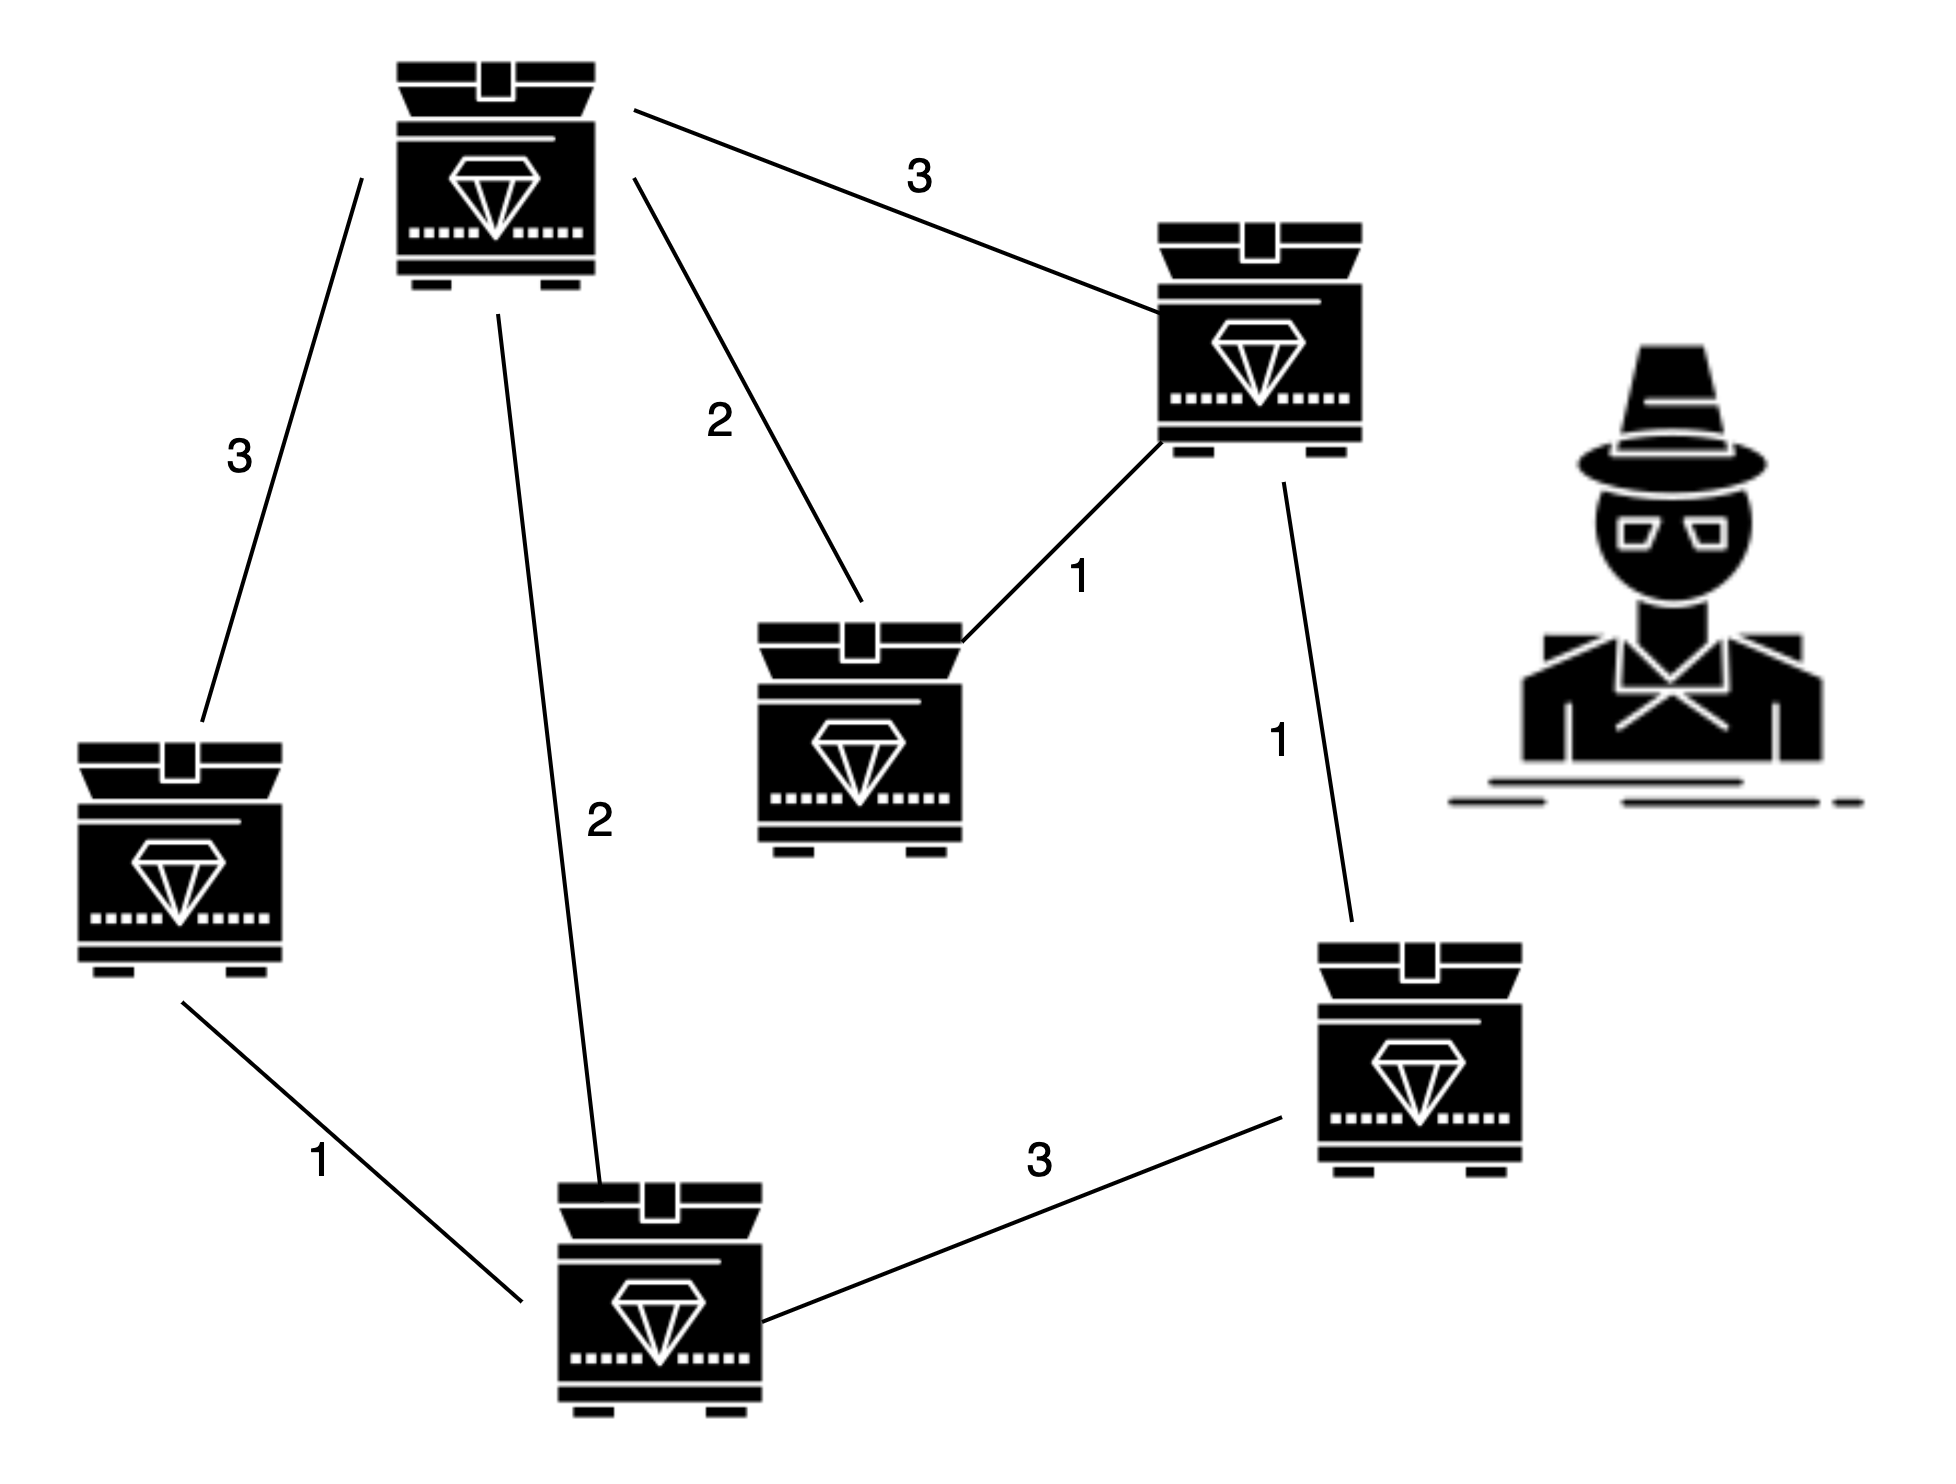

The above graph is just for visualization, it is not a test case to consider.

The nodes are the ruins and the weight on the edges(bi-directional) coresspond to the distance (in thousands of km) you need to travel in order to move from 1 ruin to the other. To solve this problem, you must find the optimal route that will allow you to visit each ruin while minimizing the total distance traveled. 

Your program should take as input a list of lists defining the adjacency matrix of a graph. The edge weights of 2 connecting nodes must be stored at indices row 0 and col 1 i.e., if the distance between ruin 0 and ruin 1 is 3000 km, graph[0][1] = 3  

example input:
```
graph = [[0, 9, 0, 1, 0],
        [2, 0, 3, 7, 5],
        [0, 3, 9, 0, 7],
        [4, 8, 1, 0, 9],
        [0, 3, 6, 9, 0]]
```

The program must be able to output the edges and the weights selected by the algorithm in the form (the order of the node in edges while printing does not matter i.e., 1 - 2 is equal to 2 - 1:

```
Edge 	Weight
2 - 1 	 3
3 - 2 	 0
0 - 3 	 4
1 - 4 	 3
```
One more test case is provided below:


In [7]:
import heapq

def primMST(graph):
    num_nodes = len(graph)
    visited = [False] * num_nodes
    # (weight, current_node, parent_node)
    min_heap = [(0, 0, -1)]  
    mst_edges = []
    total_weight = 0
    
    while len(mst_edges) < num_nodes - 1:
        weight, current, parent = heapq.heappop(min_heap)
        
        if visited[current]:
            continue
        
        visited[current] = True
        if parent != -1:
            mst_edges.append((parent, current, weight))
            total_weight += weight
        
        for neighbor, edge_weight in enumerate(graph[current]):
            if edge_weight > 0 and not visited[neighbor]:
                heapq.heappush(min_heap, (edge_weight, neighbor, current))
    
    print("Edge\tWeight")
    for u, v, w in mst_edges:
        print(f"{u} - {v}\t{w}")


# Driver's code
if __name__ == '__main__':
    graph = [[0, 2, 0, 1, 0],
             [2, 0, 3, 8, 5],
             [0, 3, 0, 0, 1],
             [1, 8, 0, 0, 9],
             [0, 5, 7, 9, 0]]

    primMST(graph)


Edge	Weight
0 - 3	1
0 - 1	2
1 - 2	3
2 - 4	1
